# Prediction using supervised Learning
Predict the number of students based on number of hours they study

Made by: Raghu Madhav Tiwari

In [1]:
# importing the basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing the dataset
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

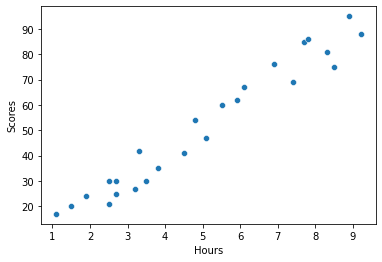

In [4]:
# plotting distribution of scores
sns.scatterplot(x="Hours",y="Scores",data=df)

From above visualization we can clearly see that there is a positive relation between number of hours studied and marks of a student

In [5]:
# preparing the data
X=df['Hours'][:,np.newaxis] 
y=df['Scores']

<ipython-input-5-0849df320d68>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X=df['Hours'][:,np.newaxis]


In [6]:
# train- test split
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [8]:
# Model Selection
from sklearn.linear_model import LinearRegression

In [9]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [10]:
from sklearn import metrics
print("Training Score: {}".format(lr.score(X_train,y_train)))
print("Testing score: {}".format(y_pred))
r2_score=metrics.r2_score(y_test,y_pred)
print("r2_score:{}".format(r2_score))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Training Score: 0.9674188920360698
Testing score: [47.2316382  37.07543958 76.68461419 87.85643268 50.27849779 20.82552179
 57.38783682 61.45031627]
r2_score:0.8550286833272732
MSE: 43.036094460392746
MAE: 5.488243998684638
RMSE: 6.560190123799214


C:\Users\Raghu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


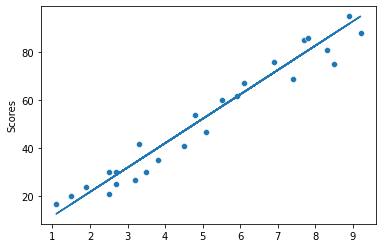

In [11]:
line = lr.coef_*X+lr.intercept_
sns.scatterplot(X.flatten(),y)
plt.plot(X.flatten(),line)

In [12]:
# a table with actual values and predicted values to better understand our model
ans=pd.DataFrame({"Actual values":y_test.values,"Predicted":y_pred})
ans

,Actual values,Predicted
0,41,47.231638
1,30,37.075440
2,69,76.684614
3,75,87.856433
4,54,50.278498
5,24,20.825522
6,60,57.387837
7,62,61.450316


Text(0.5, 1.0, 'Actual vs Predicted')

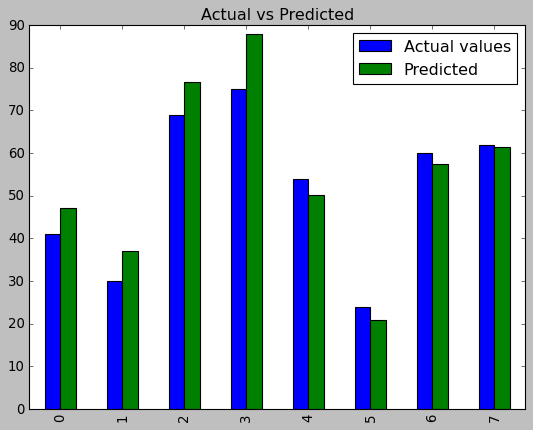

In [13]:
plt.style.use('classic')

ans.plot(kind='bar')

plt.title('Actual vs Predicted')

In [14]:
# predicting score of student who studies 9.25 hours
hours=9.25
out=lr.predict(np.array([hours]).reshape(-1,1))[0]
out

95.47358163916667

We have pedicted a score of **94.5** for a student who studies 9.25 hours with the help of our Linear Regression Model